In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jaxley as jx

# from jaxley.channels import Leak, HH
from jaxley_mech.channels.hh import Na, K, Leak
from jaxley_mech.synapses.iku98 import APB, Glu

from jaxley_mech.utils import prettify

/Users/ziweih/Works/retimod/jaxley/jaxley/modules/base.py:1694: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.pointer.edges = pd.concat(


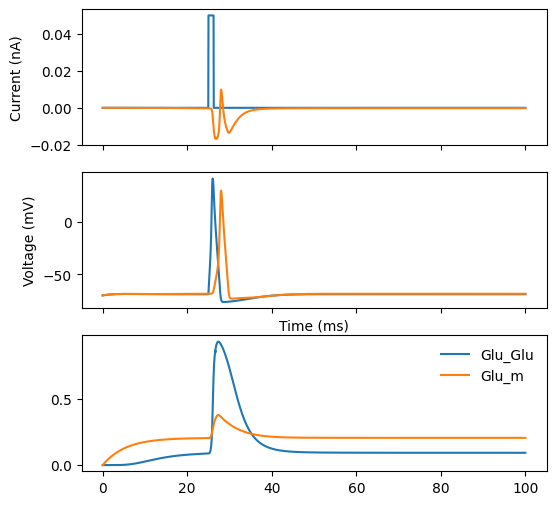

In [2]:
n_cells = 2
dt = 0.025
t_max = 100

# Define a compartment, branch, and cell
comp = jx.Compartment()
branch = jx.Branch(comp, nseg=1)
cell = jx.Cell(branch, parents=[-1])

# Define the network and connectivity
network = jx.Network([cell for _ in range(n_cells)])
jx.connect(
    network.cell(0).branch(0).loc(0.5),
    network.cell(1).branch(0).loc(0.5),
    Glu(),
)
cell1 = network.cell([0])
cell2 = network.cell([1])

# Insert mechanisms
cell1.insert(Na())
cell1.insert(K())
cell1.insert(Leak())

cell2.insert(Na())
cell2.insert(K())
cell2.insert(Leak())

network.init_states()

# network.delete_recordings()
network.cell(0).record(verbose=False)
network.cell(1).record(verbose=False)
network.record("Glu_Glu", verbose=False)
network.record("Glu_m", verbose=False)
network.record("Glu_current", verbose=False)


time = jnp.arange(0, t_max, step=dt)
inp_current = jnp.zeros_like(time)
inp_current = inp_current.at[1000:1050].set(.05)

data_stimuli = None
data_stimuli = network.cell(0).data_stimulate(inp_current, data_stimuli=data_stimuli)

s = jx.integrate(
    network, t_max=t_max, delta_t=dt, solver="bwd_euler", data_stimuli=data_stimuli
)

fig, ax = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

_ = ax[0].plot(time, inp_current)
_ = ax[0].plot(time, s[6, :-1], label="Glu_current")
_ = ax[1].plot(time, s[0, :-1], label="Cell 0")
_ = ax[1].plot(time, s[1, :-1], label="Cell 1")
_ = ax[2].plot(time, s[2, :-1], label="Glu_Glu")
_ = ax[2].plot(time, s[4, :-1], label="Glu_m")

ax[0].set_ylabel("Current (nA)")
ax[1].set_ylabel("Voltage (mV)")
ax[1].set_xlabel("Time (ms)")
plt.legend(frameon=False)

/Users/ziweih/Works/retimod/jaxley/jaxley/modules/base.py:1694: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.pointer.edges = pd.concat(


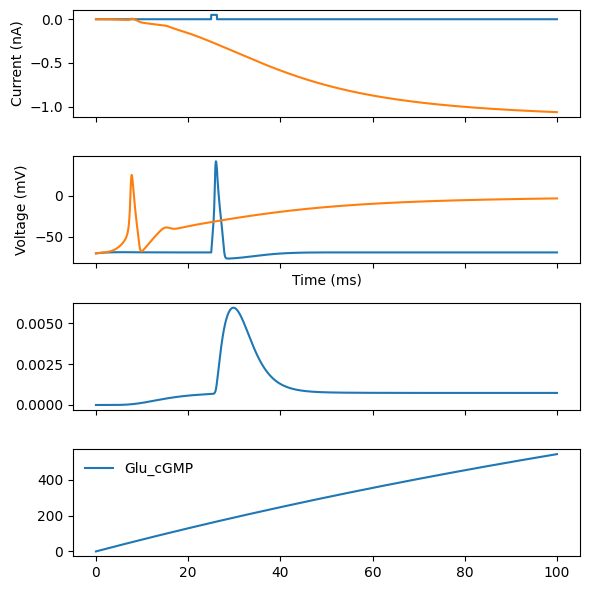

In [3]:
n_cells = 2
dt = 0.025
t_max = 100

# Define a compartment, branch, and cell
comp = jx.Compartment()
branch = jx.Branch(comp, nseg=1)
cell = jx.Cell(branch, parents=[-1])

# Define the network and connectivity
network = jx.Network([cell for _ in range(n_cells)])
jx.connect(
    network.cell(0).branch(0).loc(0.5),
    network.cell(1).branch(0).loc(0.5),
    APB(),
)
cell1 = network.cell([0])
cell2 = network.cell([1])

# Insert mechanisms
cell1.insert(Na())
cell1.insert(K())
cell1.insert(Leak())

cell2.insert(Na())
cell2.insert(K())
cell2.insert(Leak())

network.init_states()

# network.delete_recordings()
network.cell(0).record(verbose=False)
network.cell(1).record(verbose=False)

network.record("APB_PDE", verbose=False)
network.record("APB_cGMP", verbose=False)
# network.record("APB_Glu", verbose=False)
# network.record("APB_m", verbose=False)
network.record("APB_current", verbose=False)


time = jnp.arange(0, t_max, step=dt)
inp_current = jnp.zeros_like(time)
inp_current = inp_current.at[1000:1050].set(.05)

data_stimuli = None
data_stimuli = network.cell(0).data_stimulate(inp_current, data_stimuli=data_stimuli)

s = jx.integrate(
    network, t_max=t_max, delta_t=dt, solver="bwd_euler", data_stimuli=data_stimuli
)
# ["v_pre", "v_post", "APB_PDE", "APB_cGMP", "APB_Glu", "APB_m", "APB_current"]
# s = prettify(s_o, dt=dt, rec_states=["v_pre", "v_post", "APB_cGMP"])


fig, ax = plt.subplots(4, 1, figsize=(6, 6), sharex=True)

_ = ax[0].plot(time, inp_current)
_ = ax[0].plot(time, s[6, :-1], label="Glu_current")
_ = ax[1].plot(time, s[0, :-1], label="Cell 0")
_ = ax[1].plot(time, s[1, :-1], label="Cell 1")
_ = ax[2].plot(time, s[2, :-1], label="Glu_PDE")
_ = ax[3].plot(time, s[4, :-1], label="Glu_cGMP")

ax[0].set_ylabel("Current (nA)")
ax[1].set_ylabel("Voltage (mV)")
ax[1].set_xlabel("Time (ms)")
plt.legend(frameon=False)
plt.tight_layout()